In [10]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline

In [11]:
# read in the data
df = pd.read_csv('movies.csv')

In [81]:
pd.set_option('display.max_rows', None)

In [12]:
# view the data
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [5]:
# data rows adn columns
df.shape

(7668, 15)

In [6]:
# data column names
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [14]:
# check for missing values
df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [21]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{}: {}%'.format(col, round(pct_missing*100, 2)))

name: 0.0%
rating: 1.0%
genre: 0.0%
year: 0.0%
released: 0.03%
score: 0.04%
votes: 0.04%
director: 0.0%
writer: 0.04%
star: 0.01%
country: 0.04%
budget: 28.31%
gross: 2.46%
company: 0.22%
runtime: 0.05%


In [22]:
# clean data by removing missing values

df.dropna(inplace=True)

In [24]:
# check if the missing values are still avalaible
df.isna().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [26]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [39]:
# change data types
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')

In [40]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [63]:
# create new column
df['released_year'] = df['released'].str.split(', ').str.get(1).str.split('(').str.get(0)

In [65]:
df.head(50)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95.0,1980
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133.0,1980
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129.0,1980
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127.0,1981
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100.0,1980


In [69]:
#sort values by gross column

df.sort_values(by='gross', ascending=False, inplace=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982


In [74]:
# check and drop duplicates
df.duplicated()

np.int64(0)

In [13]:
df['company'].drop_duplicates().sort_values(ascending=False).head()

7129                     thefyzz
5664                 micro_scope
6412    iDeal Partners Film Fund
4007                    i5 Films
6793                  i am OTHER
Name: company, dtype: object

In [83]:
# Check for correlations

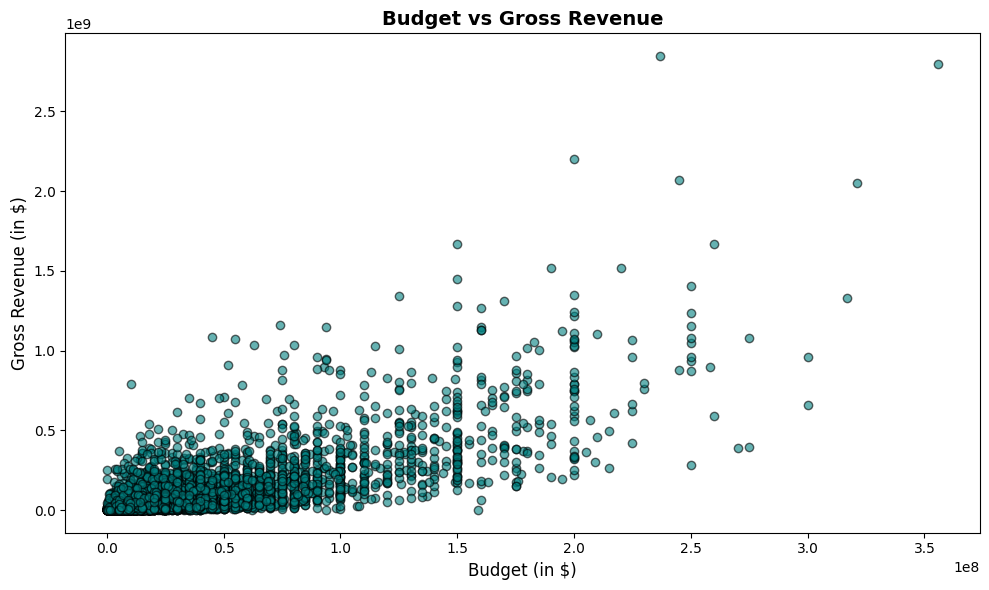

In [90]:
plt.figure(figsize=(10, 6)) 

x = df['budget']
y = df['gross']

plt.scatter(x,y, alpha=0.6, color='teal', edgecolor='k')  # Add color, transparency & edge
plt.title('Budget vs Gross Revenue', fontsize=14, fontweight='bold')
plt.xlabel('Budget (in $)', fontsize=12)
plt.ylabel('Gross Revenue (in $)', fontsize=12)
plt.tight_layout()  
plt.show()

In [102]:
#sort data by gross
df.sort_values(by='gross', ascending=False, inplace=True)

In [117]:
# reset index
df.reset_index(inplace=True)

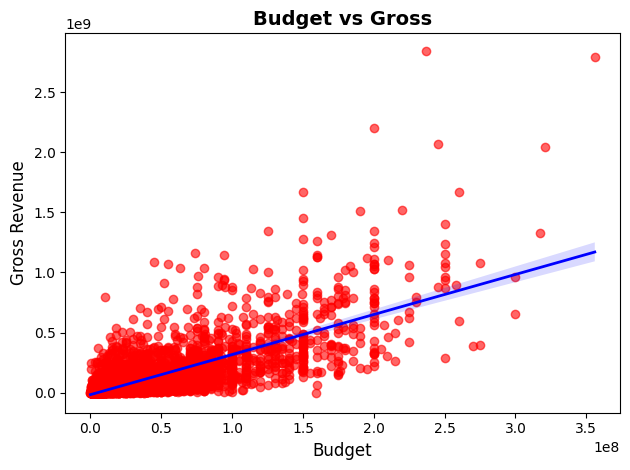

In [112]:
sns.regplot(data=df,
            x='budget',
            y='gross', 
            scatter_kws={"color": "red", "alpha": 0.6},
            line_kws={"color": "blue", "linewidth": 2})
plt.title('Budget vs Gross', fontsize=14, fontweight='bold')
plt.xlabel('Budget', fontsize=12)
plt.ylabel('Gross Revenue', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
# Lets start looking at correlations

In [149]:
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

,index,year,score,votes,budget,gross,runtime
index,1.000000,0.999522,0.046493,0.192525,0.319194,0.264121,0.067925
year,0.999522,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.046493,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.192525,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.319194,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.264121,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.067925,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


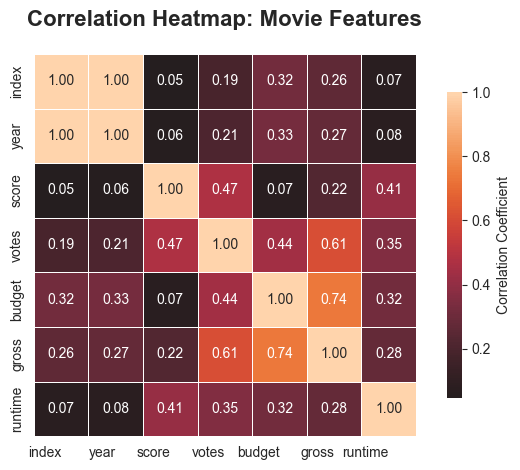

In [154]:
sns.set_style('dark')

sns.heatmap(
    correlation_matrix,
    annot=True,          # show correlation values
    #cmap='coolwarm',     # red-blue gradient color map
    fmt='.2f',           # format numbers to 2 decimals
    linewidths=0.5,      # lines between cells
    center=0,            # center color map at 0
    square=True,         # make cells square-shaped
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'}  # add colorbar label
)

# Add title and labels
plt.title('Correlation Heatmap: Movie Features', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=0, ha='right', fontsize=10)
plt.yticks(rotation=90, fontsize=10)

# Final layout adjustments
plt.tight_layout()
plt.show()

In [202]:
#count the number of film productions by each company
company_count = df['company'].value_counts().reset_index()
company_count.columns = ['company','count']
company_count.head(5)

,company,count
0,Universal Pictures,330
1,Columbia Pictures,302
2,Warner Bros.,298
3,Paramount Pictures,279
4,Twentieth Century Fox,209


In [178]:
# converts all text columns into numbers automatically.
df_numerized = df.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head(5)

,index,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
0,5445,386,5,0,2009,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162.0,29
1,7445,388,5,0,2019,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181.0,39
2,3045,4909,5,6,1997,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194.0,17
3,6663,3643,5,0,2015,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138.0,35
4,7244,389,5,0,2018,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149.0,38


In [183]:
# drop year column in df_numerized
df_numerized.drop('year', axis=1, inplace=True)

In [185]:
df_numerized.columns

Index(['index', 'name', 'rating', 'genre', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime', 'released_year'],
      dtype='object')

In [ ]:
# drop index column in df_numerized
df_numerized.drop('index', axis=1, inplace=True)

In [197]:
# drop released column in df_numerized
df_numerized.drop('released', axis=1, inplace=True)

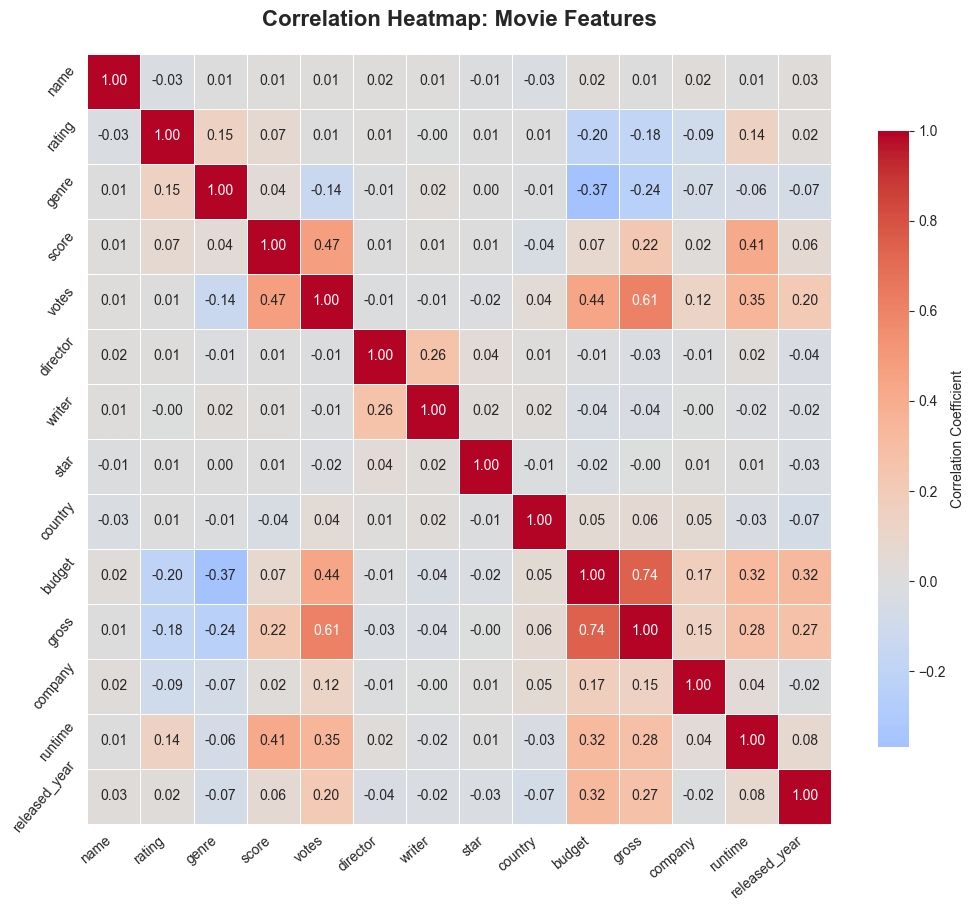

In [199]:
# plot the heatmap for df_numerized
plt.figure(figsize=(12,10))

correlation_matrix = df_numerized.corr()
correlation_matrix
sns.set_style('dark')

sns.heatmap(
    correlation_matrix,
    annot=True,          # show correlation values
    cmap='coolwarm',     # red-blue gradient color map
    fmt='.2f',           # format numbers to 2 decimals
    linewidths=0.5,      # lines between cells
    center=0,            # center color map at 0
    #square=True,         # make cells square-shaped
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'}  # add colorbar label
)

# Add title and labels
plt.title('Correlation Heatmap: Movie Features', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=40, ha='right', fontsize=10)
plt.yticks(rotation=50, fontsize=10)

# Final layout adjustments
# plt.tight_layout()
plt.show()

In [207]:
corr_pairs = df_numerized.corr().unstack()
corr_pairs

name           name             1.000000
               rating          -0.029234
               genre            0.010996
               score            0.014450
               votes            0.012615
               director         0.015246
               writer           0.012880
               star            -0.006882
               country         -0.025490
               budget           0.023392
               gross            0.005639
               company          0.021697
               runtime          0.010850
               released_year    0.026759
rating         name            -0.029234
               rating           1.000000
               genre            0.147796
               score            0.065983
               votes            0.006031
               director         0.014656
               writer          -0.003149
               star             0.009196
               country          0.008230
               budget          -0.203946
               g

In [220]:
# sorts correlations from highest to lowest removes the perfect self-correlations (1.0)shows all meaningful correlations (less than 1)
sorted_pairs = corr_pairs.sort_values(ascending=False)
sorted_pairs = sorted_pairs[sorted_pairs<1]
sorted_pairs.head()

gross   budget    0.740247
budget  gross     0.740247
gross   votes     0.614751
votes   gross     0.614751
        score     0.474256
dtype: float64

In [214]:
# 
high_corr = sorted_pairs[(sorted_pairs)  > 0.4]
high_corr

runtime        score            0.414068
score          runtime          0.414068
votes          budget           0.439675
budget         votes            0.439675
score          votes            0.474256
votes          score            0.474256
gross          votes            0.614751
votes          gross            0.614751
gross          budget           0.740247
budget         gross            0.740247
country        country          1.000000
votes          votes            1.000000
name           name             1.000000
star           star             1.000000
director       director         1.000000
writer         writer           1.000000
genre          genre            1.000000
rating         rating           1.000000
score          score            1.000000
gross          gross            1.000000
runtime        runtime          1.000000
company        company          1.000000
budget         budget           1.000000
released_year  released_year    1.000000
dtype: float64

# Four Decades of Movie Industry Analysis

<a href="https://www.kaggle.com/datasets/danielgrijalvas/movies">View Project Original Data on Kaggle</a>


## Objective

The goal of this project was to analyze data from the global movie industry over the past four decades to uncover trends, relationships, and insights related to film performance, production budgets, and company outputs.

## Tools and Libraries

Python, Pandas, NumPy – for data cleaning, transformation, and analysis

Seaborn, Matplotlib – for data visualization and correlation analysis

## Key Steps

1. Data Loading and Cleaning

Imported the dataset (movies.csv) and inspected its structure.

Checked for missing values and removed incomplete entries to maintain data integrity.

Converted data types for key numeric columns such as budget, gross, and votes to int64.

Extracted released_year from the released column to enable time-based insights.

Removed duplicates and verified the dataset’s consistency.

2. Exploratory Data Analysis (EDA)

Created scatter plots and regression plots to study the relationship between budget and gross revenue, revealing a positive correlation between production investment and financial return.

Sorted films by gross revenue to identify top-performing titles and companies.

Used a Seaborn heatmap to visualize correlations among numerical variables like budget, gross, votes, score, runtime, and released_year.

3. Findings

Budget vs Gross: A strong positive correlation (~0.7), suggesting that higher budgets often lead to higher gross earnings.

Votes and Score: Moderate correlation, indicating that audience engagement (votes) generally aligns with film ratings.

Production Companies: Counted film releases per company to identify the most active studios.

4. Visualization Enhancements

Applied a clean, modern style with labeled axes, color distinctions, and proper figure sizing for clarity.

Used regression and correlation visuals to support analytical conclusions.

### Outcome

This analysis provides a clear picture of how investment levels, audience ratings, and production volumes interact within the movie industry. It demonstrates practical use of Python data analysis techniques — from cleaning and transformation to visualization — for extracting meaningful insights from real-world datasets.